In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [3]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [4]:
m, n = X.shape
S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [5]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

In [6]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

X2D_using_svd = X2D

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [8]:
X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [9]:
X2D_using_svd[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

In [10]:
X3D_inv = pca.inverse_transform(-X2D)
X3D_inv

array([[ 1.06264093,  0.96521363,  0.41752369],
       [ 0.06916721, -0.13243346, -0.0379105 ],
       [ 1.00192966,  0.885458  ,  0.38547857],
       [ 0.96530894,  0.19781266,  0.15360623],
       [ 0.79420718,  0.19837538,  0.13818207],
       [-1.07877329,  0.0617023 , -0.07812879],
       [ 1.05655022,  1.01086413,  0.4321394 ],
       [-0.62715861,  0.68561496,  0.17042641],
       [-0.98469872, -0.15741981, -0.14236824],
       [-0.49809827, -0.2464491 , -0.12755911],
       [ 1.04050949,  0.41987446,  0.23426718],
       [-1.07397205,  0.17413839, -0.04032387],
       [ 1.03968456,  0.68032205,  0.3207487 ],
       [ 0.98652177,  0.8845424 ,  0.38376848],
       [-1.04800647,  0.26554352, -0.00757734],
       [ 0.39862901, -0.01849123,  0.03001671],
       [-0.64034268,  0.70131132,  0.17444001],
       [-0.63083881, -0.27079666, -0.14776187],
       [-0.82553976,  0.59998218,  0.12386721],
       [ 1.11951556,  0.93895871,  0.41398736],
       [-0.4851286 , -0.28325815, -0.138

In [11]:
np.allclose(X3D_inv, X)

False

In [12]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)


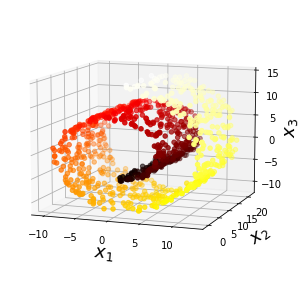

In [14]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
plt.show()

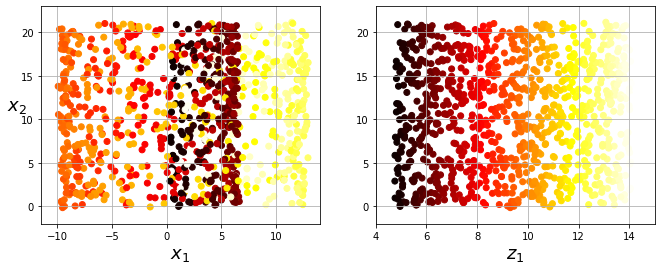

In [15]:
plt.figure(figsize=(11, 4))

#x1 x2 평면에 투영시킴
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

#매니폴드 학습
plt.subplot(122)
plt.scatter(t, X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

### PCA

In [16]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [17]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [18]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
#누적 설명분산비율이 95%를 넘는  
d = np.argmax(cumsum >= 0.95) + 1

In [28]:
np.argmax(cumsum >= 0.95)

153

In [31]:
np.argmin(cumsum >= 0.95)

0

In [32]:
a = [1,2,3,4,5]

In [34]:
np.argmax(np.array(a) > 3)

3

In [35]:
np.array(a) > 3

array([False, False, False,  True,  True])

Text(70, 0.7, 'Elbow')

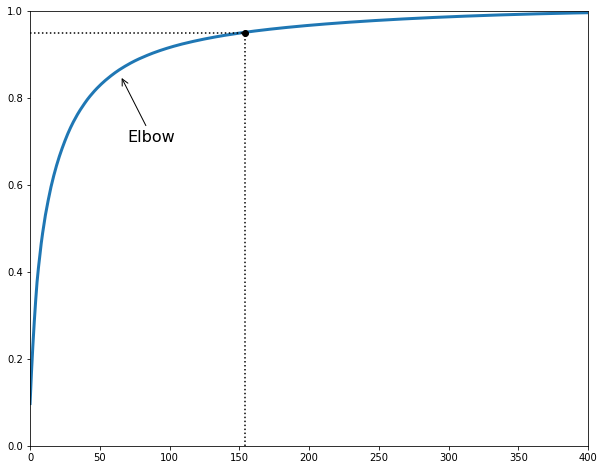

In [39]:
plt.figure(figsize=(10,8))
plt.plot(cumsum,linewidth = 3)
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.axis([0, 400, 0, 1])
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)

In [40]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)

In [41]:
X_train.shape

(52500, 784)

In [42]:
X_reduced.shape

(52500, 154)